In [1]:
# example of gathering, reading, and plotting data
# developed by Eve Marenghi for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3

In [27]:
# Import modules that will be used in the script 
import os 
import pandas as pd
import matplotlib.pyplot as plt

using Department of Environmental Protection (DEP) data on water consumption 

https://data.cityofnewyork.us/Environment/Water-Consumption-In-The-New-York-City/ia2d-e54m --> data

downloaded the data via the download link on NYC Open Data
and uploaded to PUIdata directory

In [28]:
# Test if the data is there 
!ls $PUIDATA

water_consumption.csv


# read in the data with pandas

In [30]:
# Read in the data with pandas
wc = pd.read_csv("%s/water_consumption.csv"%os.getenv("PUIDATA"))

In [6]:
# Print the first 8 lines out 
wc.head(8)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182
7,1986,7319246.0,1351.0,185


In [7]:
# Print the last 3 lines out
wc.tail(3)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
36,2015,8516502.0,1009.0,118
37,2016,8537673.0,1002.0,117
38,2017,8622698.0,990.2,115


In [8]:
# Look at the columns available (the variables)
wc.columns

Index(['Year', 'New York City Population',
       'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [9]:
# Count how many rows (the data points)
wc.size

156

In [10]:
# Select two columns for plotting
wc_2c = wc[['New York City Population', 'Per Capita(Gallons per person per day)']]

In [11]:
# Look at the top rows from the two column dataframe 
wc_2c.head()

,New York City Population,Per Capita(Gallons per person per day)
0,7102100.0,213
1,7071639.0,213
2,7089241.0,185
3,7109105.0,194
4,7181224.0,198


In [12]:
# Find out some information about the table 
wc_2c.describe()

,New York City Population,Per Capita(Gallons per person per day)
count,3.900000e+01,39.000000
mean,7.789046e+06,160.307692
std,4.770796e+05,31.930973
min,7.071639e+06,115.000000
25%,7.343326e+06,133.500000
50%,7.858259e+06,155.000000
75%,8.133419e+06,188.000000
max,8.622698e+06,213.000000


In [13]:
# Calculate and print percent changes for the variables
consumption_change = 100 * (wc_2c['Per Capita(Gallons per person per day)'].max()-wc_2c['Per Capita(Gallons per person per day)'].min())/wc_2c['Per Capita(Gallons per person per day)'].max()
print(consumption_change)

population_change = 100 * (wc_2c['New York City Population'].max()-wc_2c['New York City Population'].min())/wc_2c['New York City Population'].max()
print(population_change)


46.0093896714
17.9880937498


# plot the data

In [32]:
# Assign the x and y variables for plotting 
x = wc_2c['New York City Population']
y = wc_2c['Per Capita(Gallons per person per day)']

In [33]:
%matplotlib inline

Text(0.5,-0.1,'Figure 1: Per capita water consumption (gallons per person per day) against NYC population\n        as reported by the NYC Department of Environmental Protection (DEP) between 1979 and 2017.\n        The two variables display a strong negative correlation. As the NYC population has increased, \n        the NYC per capita water consumption has decreased. Note that the per capita water consumption \n        has decreased 46% while the population has increased 18%. ')

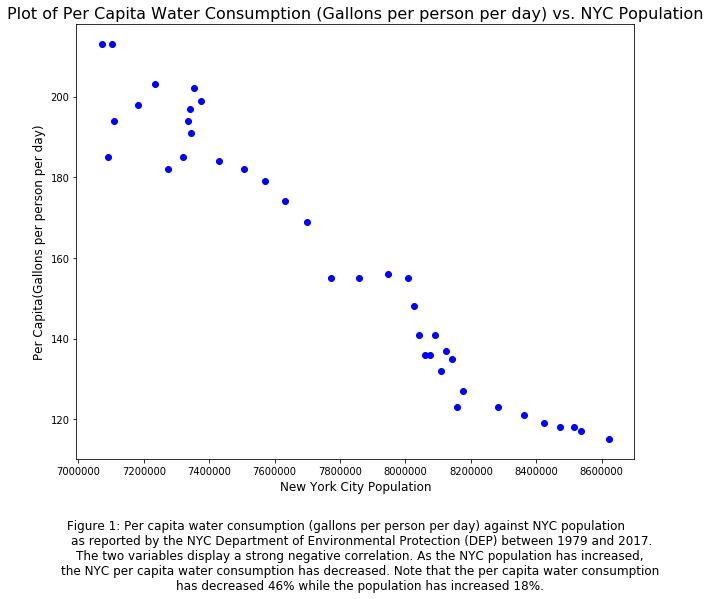

In [34]:
# Plot the data 
fig = plt.figure(figsize = (10,8))
plt.plot(x, y, 'bo')
plt.title('Plot of Per Capita Water Consumption (Gallons per person per day) vs. NYC Population', fontsize=16)
plt.xlabel('New York City Population', fontsize=12)
plt.ylabel('Per Capita(Gallons per person per day)', fontsize=12)

# Add a caption
txt = """Figure 1: Per capita water consumption (gallons per person per day) against NYC population
        as reported by the NYC Department of Environmental Protection (DEP) between 1979 and 2017.
        The two variables display a strong negative correlation. As the NYC population has increased, 
        the NYC per capita water consumption has decreased. Note that the per capita water consumption 
        has decreased 46% while the population has increased 18%. """
fig.text(.5, -0.1, txt, ha='center', fontsize=12)

# solution 2: Use API and downloads a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [35]:
# Get the URL from NYC Open Data 
url = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [36]:
# Use the appropriate Pandas function to read in the json file 
df = pd.read_json(url)

In [37]:
# Print out the top of the dataframe
df.head(3)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981


In [38]:
# Select a date and two variables 
wc_3c = df[['year', 'new_york_city_population', 'per_capita_gallons_per_person_per_day']]

In [39]:
# For consistency, change the names of the columns (variables) to the same names we used before
wc_3c.rename(columns = {'year':'Year', 
                        'new_york_city_population':'New York City Population',
                       'per_capita_gallons_per_person_per_day':'Per Capita(Gallons per person per day)'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [40]:
# Assign x and y variables for plotting
x2 = wc_3c['Year']
y2 = wc_3c['Per Capita(Gallons per person per day)']

Text(0.5,-0.05,'Figure 2: Per capita water consumption (gallons per person per day) as a function of time between 1979 and \n        2017. There is a strong negative correlation. Per capita water consumption \n        has decreased 46% between 1979 and 2017. ')

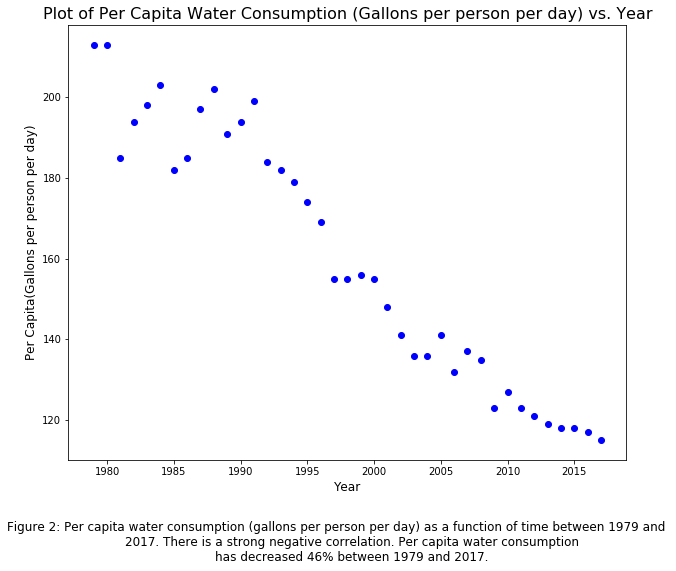

In [41]:
# Plot the data 
fig = plt.figure(figsize = (10,8))
plt.plot(x2, y2, 'bo')
plt.title('Plot of Per Capita Water Consumption (Gallons per person per day) vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Per Capita(Gallons per person per day)', fontsize=12)

# Add a caption
txt = """Figure 2: Per capita water consumption (gallons per person per day) as a function of time between 1979 and 
        2017. There is a strong negative correlation. Per capita water consumption 
        has decreased 46% between 1979 and 2017. """
fig.text(.5, -0.05, txt, ha='center', fontsize=12)

In [42]:
# Assign y variable for the second plot 
y3 = wc_3c['New York City Population']

Text(0.5,-0.05,'Figure 3: New York City Population as a function of time between 1979 and \n        2017. There is a strong positive correlation. New York City Population \n        has increased 18% between 1979 and 2017. The rate of increase has been especially\n        high since 2011.')

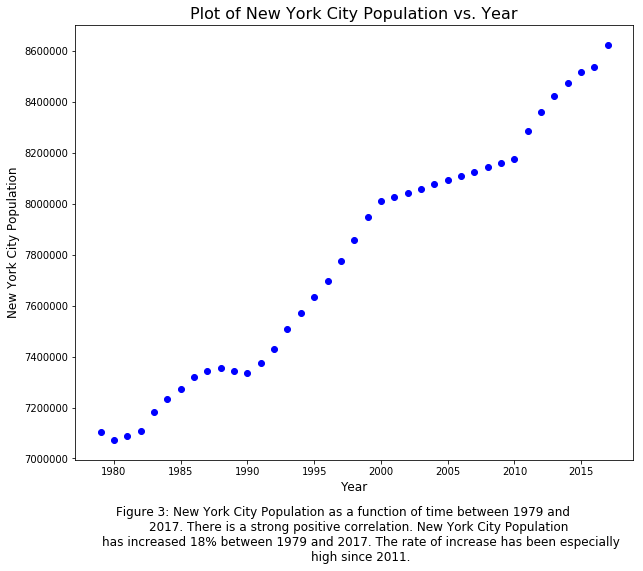

In [44]:
# Plot the data 
fig = plt.figure(figsize = (10,8))
plt.plot(x2, y3, 'bo')
plt.title('Plot of New York City Population vs. Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('New York City Population', fontsize=12)

# Add a caption
txt = """Figure 3: New York City Population as a function of time between 1979 and 
        2017. There is a strong positive correlation. New York City Population 
        has increased 18% between 1979 and 2017. The rate of increase has been especially
        high since 2011."""
fig.text(.5, -0.05, txt, ha='center', fontsize=12)